In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


In [2]:
df = pd.read_csv('../input/credit-card-approval-prediction/application_record.csv')

In [3]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [5]:
df.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
dtype: bool

In [6]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [7]:
df_clean = df.dropna(axis=0)
df_clean.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE        False
CNT_FAM_MEMBERS        False
dtype: bool

In [8]:
df_clean =  df_clean.drop(['CODE_GENDER','DAYS_BIRTH','FLAG_EMAIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_MOBIL'],axis=1)

In [9]:
df_clean.any()

ID                     True
FLAG_OWN_CAR           True
FLAG_OWN_REALTY        True
CNT_CHILDREN           True
AMT_INCOME_TOTAL       True
NAME_INCOME_TYPE       True
NAME_EDUCATION_TYPE    True
NAME_FAMILY_STATUS     True
NAME_HOUSING_TYPE      True
DAYS_EMPLOYED          True
OCCUPATION_TYPE        True
CNT_FAM_MEMBERS        True
dtype: bool

In [10]:
df_clean.dtypes

ID                       int64
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_EMPLOYED            int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [11]:
df_clean['FLAG_OWN_CAR'] = pd.factorize(df_clean['FLAG_OWN_CAR'])[0]
df_clean['FLAG_OWN_REALTY'] = pd.factorize(df_clean['FLAG_OWN_REALTY'])[0]
df_clean['NAME_INCOME_TYPE'] = pd.factorize(df_clean['NAME_INCOME_TYPE'])[0]
df_clean['NAME_EDUCATION_TYPE'] = pd.factorize(df_clean['NAME_EDUCATION_TYPE'])[0]
df_clean['NAME_FAMILY_STATUS'] = pd.factorize(df_clean['NAME_FAMILY_STATUS'])[0]
df_clean['NAME_HOUSING_TYPE'] = pd.factorize(df_clean['NAME_HOUSING_TYPE'])[0]
df_clean['OCCUPATION_TYPE'] = pd.factorize(df_clean['OCCUPATION_TYPE'])[0]

In [12]:
X = df_clean.values
X.shape

(304354, 12)

In [13]:
df_label = pd.read_csv('../input/credit-card-approval-prediction/credit_record.csv')

In [14]:
df_label

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [15]:
df_label.isnull().any()

ID                False
MONTHS_BALANCE    False
STATUS            False
dtype: bool

In [16]:
df_label.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [17]:
df_label['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [18]:
df_label['STATUS'] = pd.factorize(df_label['STATUS'])[0]

In [19]:
df_label_clean = df_label[df_label['STATUS'] != 0 ]

In [20]:
df_label_clean['STATUS'][df_label['STATUS'] > 2 ] = 10

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [21]:
df_label_clean['STATUS'][df_label['STATUS'] <= 2 ] = 0

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [22]:
df_label_group = df_label_clean.groupby('ID').mean()

In [23]:
df_label_group['STATUS'][df_label_group['STATUS'] > 0] = 1
df_label_group['STATUS'][df_label_group['STATUS'] <= 0] = 0

In [24]:
df_label_group.groupby('STATUS')['STATUS'].count()

STATUS
0.0    36099
1.0     5350
Name: STATUS, dtype: int64

In [25]:
df_label_group

,MONTHS_BALANCE,STATUS
ID,,
5001711,-2.000000,0.0
5001712,-9.000000,0.0
5001717,-10.500000,0.0
5001718,-18.724138,1.0
5001719,-21.000000,0.0
...,...,...
5150480,-36.500000,0.0
5150482,-19.500000,0.0
5150484,-6.000000,0.0


In [26]:
client_id = df_label_group.index.values
client_label = df_label_group['STATUS'].values

In [27]:
df_clean.dtypes

ID                       int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE         int64
NAME_EDUCATION_TYPE      int64
NAME_FAMILY_STATUS       int64
NAME_HOUSING_TYPE        int64
DAYS_EMPLOYED            int64
OCCUPATION_TYPE          int64
CNT_FAM_MEMBERS        float64
dtype: object

In [28]:
X_clien_id = df_clean['ID'].values
df_clean =  df_clean.drop(['ID'],axis=1)

In [29]:
X = df_clean.values
X.shape

(304354, 11)

In [30]:
real_client_id = [item for item in X_clien_id if item in client_id]

In [31]:
y = np.array([client_label[np.where(client_id == item)][0] for item in real_client_id])

In [32]:
X_final = [X[np.where(X_clien_id == item), :][0] for item in real_client_id] 

In [33]:
X_real_final = np.vstack(X_final)

In [34]:
X_real_final.shape

(22737, 11)

In [35]:
len(y)

22737

In [36]:
sum(y==0)

19648

In [37]:
sum(y==1)

3089

In [38]:
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler(random_state=1)
X_res, y_res = sm.fit_resample(X_real_final, y)

In [39]:
from sklearn.model_selection import train_test_split #มีข้อมูล 2 set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [41]:
import time
import sys
from time import sleep
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

t0 = time.time()
pr = {
    'n_estimators' : [10,50,100,200,300,500],
    'min_samples_leaf' : [1,2,4,8,16,32,64],
}

for i in tqdm(pr):
    best_clf = RandomizedSearchCV(ExtraTreesClassifier(random_state=0),pr,cv=10,scoring='accuracy',n_iter=5,random_state=0) 
    best_clf.fit(X_train_norm, y_train)
print ("Training time: " + str(round(time.time()-t0,2)) + " s")

  0%|          | 0/2 [00:00<?, ?it/s]

Training time: 61.96 s


In [42]:
yp = best_clf.predict(X_test_norm)
acc_test = sum(yp == y_test)/len(y_test)
print("Best score is " + str(best_clf.best_score_*100) +('\n') +"Best param is " + str(best_clf.best_params_))
print("Test Training Acc. : " + str(acc_test*100))

Best score is 63.015279376038855
Best param is {'n_estimators': 300, 'min_samples_leaf': 1}
Test Training Acc. : 67.63754045307444


In [43]:
import tensorflow as tf

In [44]:
tf.compat.v1.reset_default_graph() # Clear Model
np.random.seed(1) # Fix Randomness
tf.compat.v1.random.set_random_seed(1) # Fix Randomness

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(250, activation='relu', input_shape=(11,)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(25, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               37650     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 62,101
Trainable params: 62,101
Non-trainable params: 0
____________________________________________________

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
import sys

train_acc = list()
val_acc = list()
t0 = time.time()
for i in tqdm(range(0,250)):
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 200, validation_data= (X_val_norm, y_val))
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)
print ("Running time: " + str(round(time.time()-t0,2)) + " s")

  0%|          | 0/250 [00:00<?, ?it/s]

20/20 [==============================] - 0s 13ms/step - loss: 0.2752 - accuracy: 0.8571 - val_loss: 1.5133 - val_accuracy: 0.6380
Running time: 77.76 s


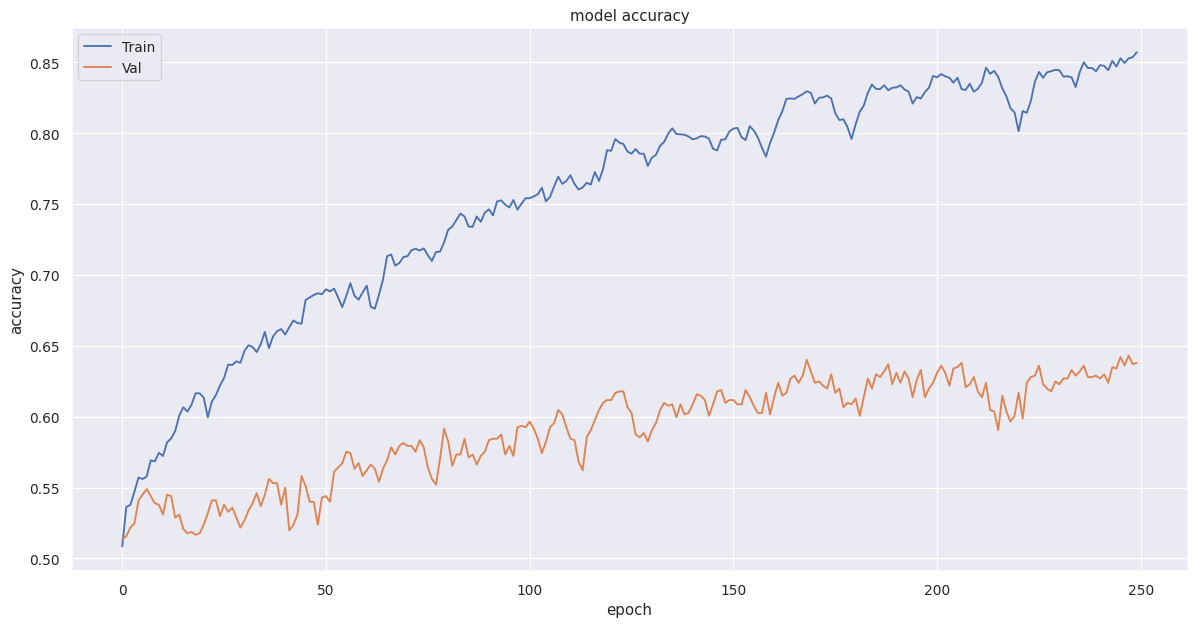

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [48]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = np.array([i[0] for i in y_predict.tolist()])
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 65.45307443365695
